In [86]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training_data = pd.read_csv('train.csv', engine='python', sep=',', nrows=8400)
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
training_data.shape

(8400, 785)

In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.3 MB


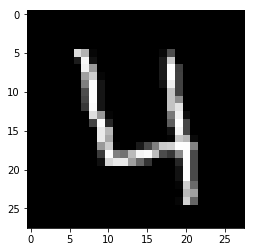

In [93]:
number = training_data.iloc[3, 1:]
plt.imshow(number.values.reshape(28, 28), cmap='gray')

In [18]:
training_data.isnull().count()

label       8400
pixel0      8400
pixel1      8400
pixel2      8400
pixel3      8400
pixel4      8400
pixel5      8400
pixel6      8400
pixel7      8400
pixel8      8400
pixel9      8400
pixel10     8400
pixel11     8400
pixel12     8400
pixel13     8400
pixel14     8400
pixel15     8400
pixel16     8400
pixel17     8400
pixel18     8400
pixel19     8400
pixel20     8400
pixel21     8400
pixel22     8400
pixel23     8400
pixel24     8400
pixel25     8400
pixel26     8400
pixel27     8400
pixel28     8400
            ... 
pixel754    8400
pixel755    8400
pixel756    8400
pixel757    8400
pixel758    8400
pixel759    8400
pixel760    8400
pixel761    8400
pixel762    8400
pixel763    8400
pixel764    8400
pixel765    8400
pixel766    8400
pixel767    8400
pixel768    8400
pixel769    8400
pixel770    8400
pixel771    8400
pixel772    8400
pixel773    8400
pixel774    8400
pixel775    8400
pixel776    8400
pixel777    8400
pixel778    8400
pixel779    8400
pixel780    8400
pixel781    84

In [25]:
training_data.groupby('label').mean()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.153846,0.808266,0.195178,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
training_data.groupby('label').pixel1.count()

label
0    833
1    926
2    883
3    843
4    815
5    756
6    839
7    871
8    795
9    839
Name: pixel1, dtype: int64

## Data preparation:

In [35]:
round(training_data.drop('label', axis=1).mean() , 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.03
pixel762    0.10
pixel763    0.14
pixel764    0.15
pixel765    0.10
pixel766    0.27
pixel767    0.48
pixel768    0.66
pixel769    0.59
pixel770    0.71
pixel771    0.52
pixel772    0.39
pixel773    0.26
pixel774    0.16
pixel775    0.12
pixel776    0.02
pixel777    0.00
pixel778    0.00
pixel779    0.00
pixel780    0.00
pixel781    0.

In [36]:
x = training_data.drop('label', axis=1)
y = training_data['label']

In [37]:
x_scaled = scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)
x_train.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


(5880, 784)

## Model building: 

#### SVM model with kernel Linear:

In [38]:
linear_model = SVC(kernel='linear', C=10)
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [42]:
metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

0.9067460317460317

In [45]:
metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[236,   0,   1,   0,   0,   2,   1,   1,   0,   1],
       [  0, 283,   0,   0,   0,   0,   0,   1,   1,   0],
       [  3,   6, 240,   3,   2,   3,   1,   2,   6,   2],
       [  1,   2,   7, 222,   0,   7,   0,   3,   3,   2],
       [  0,   0,   4,   0, 244,   0,   0,   0,   1,  14],
       [  1,   3,   3,  12,   1, 175,   2,   0,   8,   2],
       [  3,   1,   1,   0,   4,   1, 238,   0,   0,   0],
       [  1,   2,   5,   0,   5,   1,   0, 247,   2,  11],
       [  1,  12,   5,  10,   0,  13,   0,   2, 203,   4],
       [  2,   1,   3,   2,  14,   2,   0,  14,   1, 197]])

In [53]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.9067460317460317

In [55]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.9066238656866836

#### SVM model with kernel RBF:

In [60]:
rbf_model = SVC(kernel='rbf', C=10, gamma=0.01)
rbf_model.fit(x_train, y_train)
rbf_y_pred = rbf_model.predict(x_test)

In [61]:
metrics.accuracy_score(y_pred=rbf_y_pred, y_true=y_test)

0.1130952380952381

#### ====> Linear model has more accuracy than nonlinear model 

In [62]:
rbf_model = SVC(kernel='poly', C=10)
rbf_model.fit(x_train, y_train)
rbf_y_pred = rbf_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
metrics.accuracy_score(y_pred=rbf_y_pred, y_true=y_test)

0.9432539682539682

#### Polynomial has better accuracy than RBF & Linear

## Grid search hyper parameter tuning:

In [65]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [72]:
folds = KFold(n_splits=10, shuffle=True, random_state=101)
params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 20, 100]}]
model = SVC(kernel='poly')
grid_model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=folds, verbose=1, return_train_score=True)
grid_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 46.4min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 20, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [74]:
cv_results = pd.DataFrame(grid_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,7.477694,0.209905,0.921430,0.038977,1,0.01,"{'C': 1, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,7.443190,0.229162,0.913104,0.022529,1,0.001,"{'C': 1, 'gamma': 0.001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,7.343956,0.050829,0.901522,0.006665,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,7.212066,0.070817,0.892330,0.012480,10,0.01,"{'C': 10, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,7.213019,0.094311,0.889628,0.009100,10,0.001,"{'C': 10, 'gamma': 0.001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,7.198229,0.070392,0.895935,0.010277,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,7.219228,0.098182,0.894475,0.006778,20,0.01,"{'C': 20, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,7.287300,0.103926,0.898154,0.018139,20,0.001,"{'C': 20, 'gamma': 0.001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,7.270469,0.068923,0.894220,0.015409,20,0.0001,"{'C': 20, 'gamma': 0.0001}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,7.321472,0.108766,0.898417,0.010439,100,0.01,"{'C': 100, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [98]:
gamma_01["mean_train_score"]

0    1.0
3    1.0
6    1.0
9    1.0
Name: mean_train_score, dtype: float64

In [99]:
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
gamma_01

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,7.477694,0.209905,0.921430,0.038977,1,0.01,"{'C': 1, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,7.212066,0.070817,0.892330,0.012480,10,0.01,"{'C': 10, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,7.219228,0.098182,0.894475,0.006778,20,0.01,"{'C': 20, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,7.321472,0.108766,0.898417,0.010439,100,0.01,"{'C': 100, 'gamma': 0.01}",0.947279,0.935374,0.945578,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


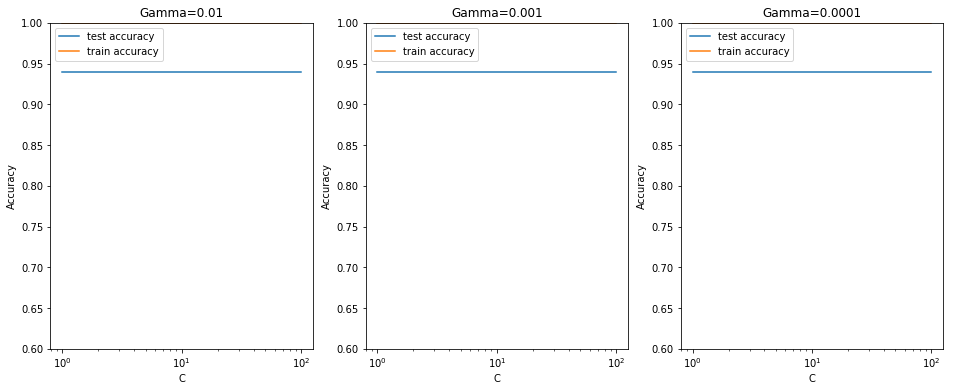

In [87]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [75]:
grid_model_cv.best_score_

0.9403061224489796

In [76]:
grid_model_cv.best_params_

{'C': 1, 'gamma': 0.01}

In [82]:
poly_model = SVC(C=1, gamma=0.01, kernel='poly', degree=9)
fold = KFold(n_splits=5, shuffle=True, random_state=101)

cross_validation_result = cross_val_score(poly_model, x_train, y_train, scoring='accuracy', cv=fold)
cross_validation_result

array([0.10034014, 0.10629252, 0.09438776, 0.1122449 , 0.0994898 ])

### Building and Evaluating the Final Model

In [83]:
poly_model = SVC(C=1, gamma=0.01, kernel='poly')
poly_model.fit(x_train, y_train)
y_pred = poly_model.predict(x_test)

In [84]:
metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

0.9432539682539682

In [96]:
print(metrics.classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       242
           1       0.89      0.99      0.94       285
           2       0.95      0.91      0.93       268
           3       0.95      0.94      0.95       247
           4       0.97      0.94      0.95       263
           5       0.94      0.94      0.94       207
           6       0.97      0.97      0.97       248
           7       0.95      0.92      0.94       274
           8       0.93      0.90      0.91       250
           9       0.92      0.93      0.93       236

   micro avg       0.94      0.94      0.94      2520
   macro avg       0.94      0.94      0.94      2520
weighted avg       0.94      0.94      0.94      2520



## Gives a final model with an accuracy of 94%